In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
matches.describe() # Statistical summary of matches

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [6]:
deliveries.describe() # Statistical summary of all deliveries

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [7]:
matches.shape

(1095, 20)

In [8]:
deliveries.shape

(260920, 17)

In [9]:
total_score_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [10]:
total_score_df  # Total score of all innings 

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [11]:
total_score_df_inn1 = total_score_df[total_score_df['inning'] == 1]

In [12]:
total_score_df_inn1 # Total score of all 1st innings

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [13]:
match_df = matches.merge(total_score_df_inn1[['match_id', 'total_runs']],left_on = 'id', right_on = 'match_id')

In [14]:
match_df # merging total runs of all 1st innings with 'matches' Dataset 

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [15]:
match_df['team1'].unique() 

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [16]:
current_teams = ['Royal Challengers Bengaluru', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Chennai Super Kings', 'Sunrisers Hyderabad', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans']  # Current Teams

In [17]:
match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['winner'] = match_df['winner'].str.replace('Kings XI Punjab', 'Punjab Kings')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['winner'] = match_df['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['winner'] = match_df['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['winner'] = match_df['winner'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')

In [18]:
match_df['team1'].unique() # old names of teams has been replaced

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Rising Pune Supergiant',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [19]:
match_df = match_df[match_df['team1'].isin(current_teams)]
match_df = match_df[match_df['team2'].isin(current_teams)]

In [20]:
match_df['team1'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [21]:
match_df.shape

(980, 22)

In [22]:
match_df['result'].value_counts()

result
wickets      512
runs         451
tie           13
no result      4
Name: count, dtype: int64

In [23]:
# Deleting the draw and undeclared matches
match_df = match_df[match_df['result'] != 'tie']
match_df = match_df[match_df['result'] != 'no result'] 

In [24]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [25]:
# Count the number of wins for each team
win_counts = match_df['winner'].value_counts().sort_values(ascending=False)
print(win_counts)

winner
Mumbai Indians                 134
Chennai Super Kings            133
Kolkata Knight Riders          122
Royal Challengers Bengaluru    109
Rajasthan Royals               105
Sunrisers Hyderabad            104
Delhi Capitals                 103
Punjab Kings                   101
Gujarat Titans                  28
Lucknow Super Giants            24
Name: count, dtype: int64


C:\Users\dinka\AppData\Local\Temp\ipykernel_11100\3943419329.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')


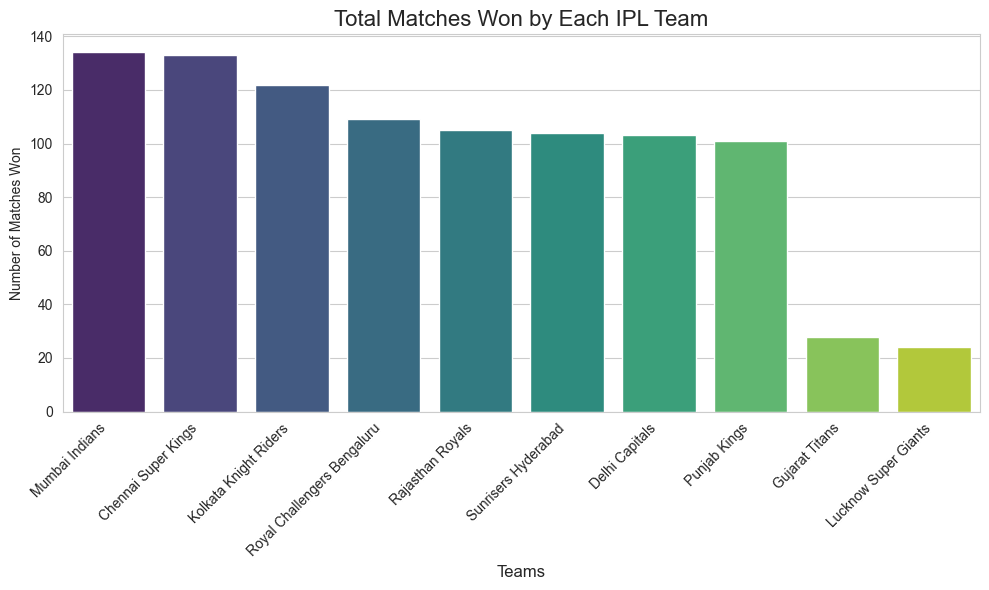

In [26]:
# Sets the plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Creates barplot
sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')

# Set titles and labels
plt.title('Total Matches Won by Each IPL Team', fontsize=16)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Number of Matches Won', fontsize=10)
plt.xticks(rotation=45, ha='right')

# Displaying plot
plt.tight_layout()
plt.show()

In [27]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [28]:
deliveries = match_df.merge(deliveries, on='match_id')

In [29]:
deliveries = deliveries[deliveries['inning'] == 2]

In [30]:
deliveries.shape

(111161, 20)

In [31]:
deliveries

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230098,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
230099,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
230100,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
230101,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [32]:
# Assuming 'deliveries' DataFrame has columns 'match_id' and 'total_runs_y'

# Calculate cumulative sum of total runs for each delivery per match
deliveries['current_score'] = deliveries.groupby('match_id')['total_runs_y'].cumsum()

In [33]:
deliveries

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230098,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,110
230099,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,111
230100,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,112
230101,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,113


In [34]:
deliveries["runs_left"] = deliveries["total_runs_x"] - deliveries["current_score"] + 1

In [35]:
deliveries['balls_left'] = 120 - (deliveries['over'] * 6 + deliveries['ball'])

In [36]:
deliveries['wickets'] = deliveries.groupby('match_id')['is_wicket'].cumsum()

In [37]:
deliveries['wickets_left'] = 10 - deliveries['wickets']

In [38]:
# crr = runs/overs or (runs / balls played)
deliveries['crr'] = deliveries['current_score'] / ((120 - deliveries['balls_left']) / 6)

In [39]:
deliveries['rrr'] = deliveries['runs_left'] /  (deliveries['balls_left'] / 6)

In [40]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [41]:
deliveries['result'] = deliveries.apply(result, axis = 1)

In [42]:
deliveries

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,wickets_left,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,NaN,1,222,119,0,10,6.000000,11.193277,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,NaN,NaN,2,221,118,0,10,6.000000,11.237288,0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,NaN,2,221,117,0,10,4.000000,11.333333,0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,NaN,3,220,116,0,10,4.500000,11.379310,0
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,NaN,4,219,115,0,10,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230098,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,NaN,NaN,110,4,61,2,8,11.186441,0.393443,1
230099,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,NaN,NaN,111,3,60,2,8,11.100000,0.300000,1
230100,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,NaN,NaN,112,2,59,2,8,11.016393,0.203390,1
230101,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,NaN,NaN,113,1,58,2,8,10.935484,0.103448,1


In [43]:
final_df = deliveries[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'crr', 'rrr', 'result']]

In [44]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,119,10,222,6.000000,11.193277,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,118,10,222,6.000000,11.237288,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,117,10,222,4.000000,11.333333,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,116,10,222,4.500000,11.379310,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,115,10,222,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...
230098,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,4,61,8,113,11.186441,0.393443,1
230099,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,60,8,113,11.100000,0.300000,1
230100,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,59,8,113,11.016393,0.203390,1
230101,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,58,8,113,10.935484,0.103448,1


In [45]:
# Shuffling the rows for better training and testing dataset

final_df = final_df.sample(final_df.shape[0])
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
81463,Delhi Daredevils,Chennai Super Kings,Abu Dhabi,177,117,10,177,2.0,9.076923,0


In [46]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
214459,Royal Challengers Bengaluru,Punjab Kings,Bengaluru,61,32,6,176,7.909091,11.437500,1
175326,Royal Challengers Bangalore,Sunrisers Hyderabad,Abu Dhabi,115,86,8,141,4.764706,8.023256,0
27065,Deccan Chargers,Kolkata Knight Riders,Mumbai,25,14,5,161,7.754717,10.714286,0
16531,Kolkata Knight Riders,Mumbai Indians,Port Elizabeth,184,114,10,187,4.000000,9.684211,0
156444,Rajasthan Royals,Delhi Capitals,NaN,122,97,9,161,10.434783,7.546392,0
...,...,...,...,...,...,...,...,...,...,...
5169,Deccan Chargers,Royal Challengers Bangalore,Bangalore,104,74,8,156,6.913043,8.432432,0
190673,Delhi Capitals,Chennai Super Kings,Navi Mumbai,112,33,3,208,6.689655,20.363636,0
112284,Kings XI Punjab,Mumbai Indians,Visakhapatnam,5,23,7,124,7.422680,1.304348,0
176974,Kolkata Knight Riders,Delhi Capitals,Sharjah,124,111,10,135,8.000000,6.702703,1


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
final_df.dropna(inplace=True)
final_df = final_df[final_df['balls_left'] != 0]

In [49]:
# Splitting training and testing dataset
X = final_df.iloc[:, :-1]   # batting_team	bowling_team	city	runs_left	balls_left	wickets_left	total_runs_x	crr	rrr
y = final_df.iloc[:, -1]    # result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(
    [
        ('transformer', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)


In [51]:
""" Creating Pipeline 
Step 1: Transformation
Step 2: Logistic Regression
"""

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [52]:
pipe = Pipeline(
    steps = [
        ('step1', transformer),
        ('step2', LogisticRegression(solver = 'liblinear'))
    ]
)

In [53]:
pipe.fit(X_train, y_train)

C:\Users\dinka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transformer',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [54]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
177782,Delhi Capitals,Mumbai Indians,Mumbai,81,44,5,177,7.657895,11.045455
42856,Royal Challengers Bangalore,Deccan Chargers,Hyderabad,174,114,10,175,2.000000,9.157895
147000,Mumbai Indians,Kolkata Knight Riders,Kolkata,96,33,5,232,9.448276,17.454545
11281,Chennai Super Kings,Rajasthan Royals,Chennai,119,62,8,211,9.620690,11.516129
17504,Delhi Daredevils,Deccan Chargers,Centurion,121,101,10,148,8.842105,7.188119
...,...,...,...,...,...,...,...,...,...
221728,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata,72,44,5,222,11.921053,9.818182
90756,Mumbai Indians,Kings XI Punjab,Chandigarh,144,113,10,156,11.142857,7.646018
10273,Mumbai Indians,Kings XI Punjab,Mumbai,130,88,9,189,11.250000,8.863636
117309,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,56,23,6,191,8.412371,14.608696


In [55]:
y_pred = pipe.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

print('Accuracy of Logistic Regression : ' , accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression :  0.8716302952503209


In [57]:
pipe.predict_proba(X_test)[5785]

array([0.95395066, 0.04604934])

In [58]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    


In [59]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [61]:
temp_df,target = match_progression(deliveries, 501268, pipe)
temp_df

Target- 175


,end_of_over,runs_after_over,wickets_in_over,lose,win
51121,1,2,0,32.3,67.7
51128,2,9,2,52.5,47.5
51134,3,1,0,59.5,40.5
51141,4,3,0,62.7,37.3
51147,5,8,0,58.6,41.4
51153,6,1,0,64.7,35.3
51159,7,3,0,67.7,32.3
51165,8,8,0,64.1,35.9
51171,9,12,0,54.7,45.3
51178,10,14,0,42.2,57.8


Text(0.5, 1.0, 'Target-175')

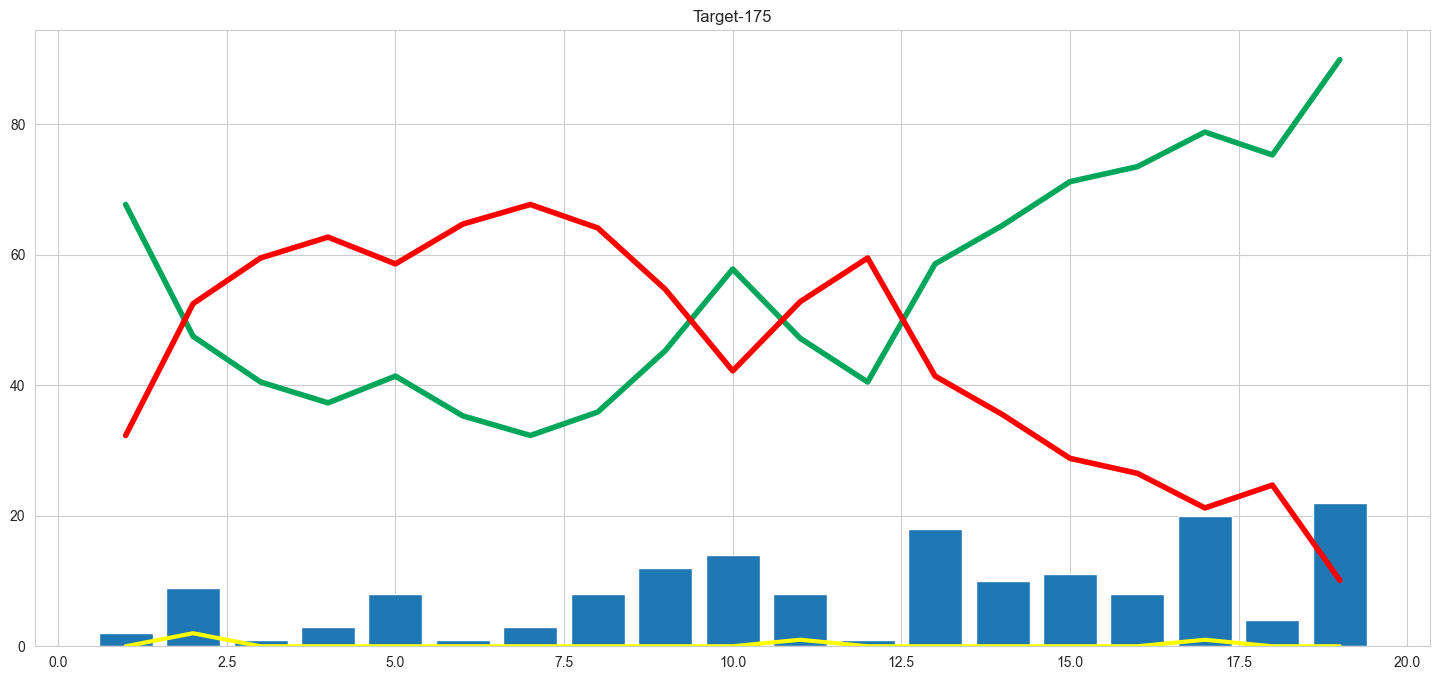

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [64]:
current_teams

['Royal Challengers Bengaluru',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Punjab Kings',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [67]:
deliveries["city"].dropna().unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [68]:
import pickle

pickle.dump(pipe, open('pipe.pkl', 'wb'))